### Table of Contents 
* [Introduction](#Introduction)
* [About the Dataset](#About-the-Dataset)
* [SQL Code](#SQL-Code)
* [Data Exploration](#Data-Exploration)
* [Observations](#Observations)
* [Group by Average Review Score](#Group-by-Average-Review-Score)
* [ANOVA (Analysis of Variance)](#ANOVA-(Analysis-of-Variance))
* [stats.f_oneway function](#stats.f_oneway-function)
* [ANOVA (Analysis of Variance) Code](#ANOVA-(Analysis-of-Variance)-Code)
* [One-Way ANOVA Test Results](#One-Way-ANOVA-Test-Results)
* [Conclusion](#Conclusion)

## Introduction
<div style="text-align: justify;">
Welcome to the analysis of the Brazilian e-commerce dataset from Olist Store. This project aims to compare the average number of sales across different rating groups using a one-way ANOVA or Analysis of Variance. ANOVA is a statistical method used to compare the means/average across three or more groups. It examines variability both within each group, and across them to determine statistical significance. <a href="https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/" target="_blank">Siavoshi, Mehrnaz. "Understanding ANOVA: When and How to Use It in Your Research." Statology. October 18, 2024.</a> We hope to uncover insights that can benefit sellers on the e-commerce platform.
<br>
<br>
    We hypothesize that there are significant differences in the average number of sales across different rating groups. This suggests that the average number of sales is not the same for all rating groups, indicating that the rating groups have an impact on sales performance.<br>
</div>

## About the Dataset
 
The dataset can be found on <strong>kaggle</strong> <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce" target="_blank">click here to view the dataset on kaggle</a>

This dataset contains public information on orders made at Olist Store, a Brazilian e-commerce platform. It includes details of 100,000 orders from 2016 to 2018 across various marketplaces in Brazil.

While this dataset offers a comprehensive view of sales during that period, it does not cover the entire population of all possible sales data. Therefore, it is considered a **sample dataset**.

**Hypothesis testing** is essentially a method to determine if the observations from a sample can be generalized to the broader population. It helps to assess whether the patterns or effects seen in the sample data are likely to be true for the entire population or if they could have occurred by random chance.

### Accessing the data
The dataset consists of 8 csv files. I've imported these files into <a href="https://sqlitebrowser.org/" target="_blank">DB Browser for SQLite</a> to query the data needed for each step and upload the files into my github repository to  be used in jupyter notebooks.

Please refer to the data schema below:

<img src="https://github.com/Mpakong/Marcel_Peter_Kong_Portfolio/blob/main/images/schema.png?raw=true">


## SQL Code
  
```sql
  WITH Products_sold_per_seller as (
SELECT seller_id, order_id, COUNT(order_id) as products_sold
  FROM olist_order_items_dataset
 GROUP BY seller_id
)

SELECT seller_id, products_sold, AVG(r.review_score) as ave_review_score
  FROM Products_sold_per_seller as p
  LEFT JOIN olist_order_reviews_dataset as r
    ON p.order_id = r.order_id
 GROUP BY seller_id
 ORDER BY products_sold DESC
 LIMIT 10;
```
***

**Output:**
<table>
  <thead>
    <tr>
      <th>seller_id</th>
      <th>products_sold</th>
      <th>ave_review_score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>6560211a19b47992c3666cc44a7e94c0</td>
      <td>2033</td>
      <td>4.0</td>
    </tr>
    <tr>
      <td>4a3ca9315b744ce9f8e9374361493884</td>
      <td>1987</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>1f50f920176fa81dab994f9023523100</td>
      <td>1931</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>cc419e0650a3c5ba77189a1882b7556a</td>
      <td>1775</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>da8622b14eb17ae2831f4ac5b9dab84a</td>
      <td>1551</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>955fee9216a65b617aa5c0531780ce60</td>
      <td>1499</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>1025f0e2d44d7041d6cf58b6550e0bfa</td>
      <td>1428</td>
      <td>5.0</td>
    </tr>
    <tr>
      <td>7c67e1448b00f6e969d365cea6b010ab</td>
      <td>1364</td>
      <td>4.0</td>
    </tr>
    <tr>
      <td>ea8482cd71df3c1969d7b9473ff13abc</td>
      <td>1203</td>
      <td>3.0</td>
    </tr>
    <tr>
      <td>7a67c85e85bb2ce8582c35f2203ad736</td>
      <td>1171</td>
      <td>5.0</td>
    </tr>
  </tbody>
</table>


```sql
CREATE TABLE anova_data AS

  WITH Products_sold_per_seller as (
SELECT seller_id, order_id, COUNT(order_id) as products_sold
  FROM olist_order_items_dataset
 GROUP BY seller_id
)

SELECT seller_id, products_sold, AVG(r.review_score) as ave_review_score
  FROM Products_sold_per_seller as p
  LEFT JOIN olist_order_reviews_dataset as r
    ON p.order_id = r.order_id
 GROUP BY seller_id
 ORDER BY products_sold DESC
```
Created a new table using the above query then exported it as a csv file.
the csv file is uploaded into my github repository to be used in jupyter notebook as a dataframe for our analysis.

[Back to Table of Contents](#Table-of-Contents)

## Data Exploration


In [2]:
import pandas as pd
olist_data = pd.read_csv("https://raw.githubusercontent.com/Mpakong/Marcel-Peter-Kong/refs/heads/main/projects/anova_data.csv")
olist_data.head()

,seller_id,products_sold,ave_review_score
0,6560211a19b47992c3666cc44a7e94c0,2033,4.0
1,4a3ca9315b744ce9f8e9374361493884,1987,5.0
2,1f50f920176fa81dab994f9023523100,1931,5.0
3,cc419e0650a3c5ba77189a1882b7556a,1775,5.0
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,5.0


In [3]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_id         3095 non-null   object 
 1   products_sold     3095 non-null   int64  
 2   ave_review_score  3073 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [4]:
olist_data['ave_review_score'].value_counts(dropna=False)

ave_review_score
5.0    1778
4.0     512
1.0     449
3.0     240
2.0      91
NaN      22
4.5       2
3.5       1
Name: count, dtype: int64

## Observations

The groups with average review scores of 3.5 and 4.5 have very few data points (1 and 2, respectively). ANOVA requires a sufficient number of observations in each group to perform the test reliably.

The presence of NaN values can affect the calculations. It is essential to handle these missing values appropriately before performing the ANOVA test.

Therefore, data with NaN, 4.5, and 3.5 values will be removed.

In [5]:
olist_data = olist_data[olist_data['ave_review_score'].notna()] 
olist_data = olist_data[~olist_data['ave_review_score'].isin([4.5, 3.5])]
olist_data['ave_review_score'].value_counts(dropna=False)

ave_review_score
5.0    1778
4.0     512
1.0     449
3.0     240
2.0      91
Name: count, dtype: int64

## Group by Average Review Score

group the data by the average review score and create lists of products sold for each review score group.

In [6]:
# Get unique review scores
unique_scores = olist_data['ave_review_score'].unique()

# Initialize an empty list to store the groups
groups = []

# Iterate over each unique review score
for score in unique_scores:
    # Filter the DataFrame for the current review score
    filtered_df = olist_data[olist_data['ave_review_score'] == score]
    
    # Get the 'products_sold' values for the current review score
    products_sold_values = filtered_df['products_sold'].values
    
    # Append the values to the groups list
    groups.append(products_sold_values)

# Now 'groups' contains the products_sold values for each unique review score
groups

[array([2033, 1364, 1156,  430,  430,  405,  363,  339,  331,  259,  255,
         228,  225,  211,  202,  194,  188,  186,  181,  178,  175,  172,
         167,  162,  157,  156,  149,  146,  143,  143,  140,  135,  131,
         130,  128,  128,  126,  125,  121,  118,  118,  110,  110,  109,
         100,  100,  100,   99,   97,   96,   95,   95,   95,   88,   86,
          84,   84,   84,   81,   78,   78,   77,   76,   75,   75,   74,
          73,   73,   73,   69,   68,   67,   63,   61,   61,   58,   57,
          55,   55,   54,   53,   51,   48,   47,   47,   46,   45,   43,
          43,   42,   42,   41,   41,   41,   39,   39,   38,   38,   38,
          38,   36,   36,   36,   36,   35,   34,   33,   33,   32,   32,
          32,   32,   32,   31,   30,   30,   30,   30,   30,   30,   30,
          30,   29,   29,   29,   28,   28,   28,   28,   28,   27,   27,
          27,   26,   26,   26,   25,   24,   24,   24,   23,   23,   23,
          23,   23,   23,   23,   23, 

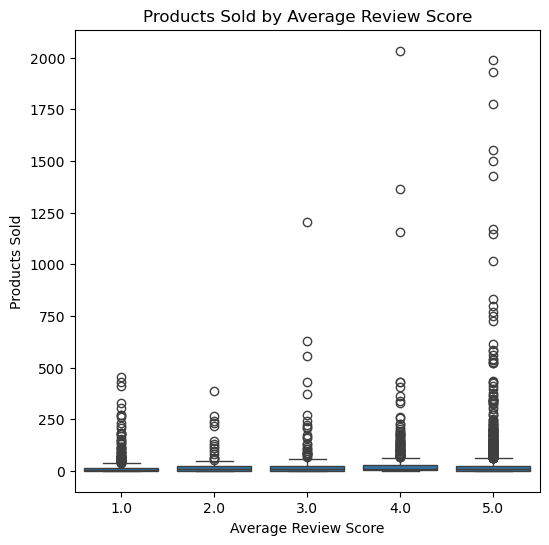

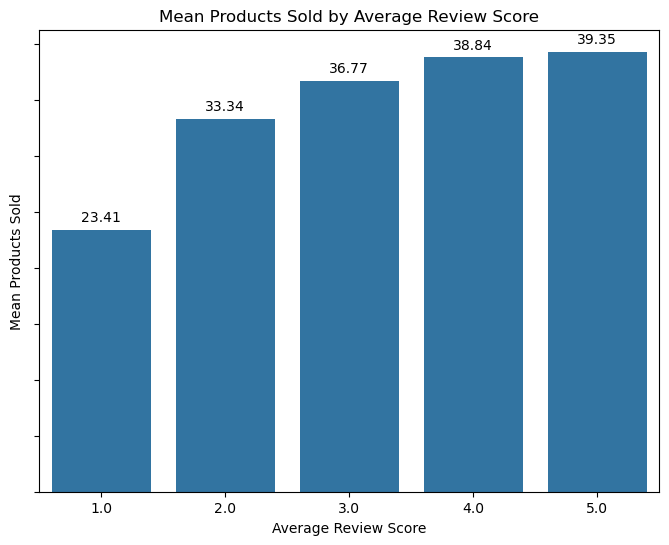

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='ave_review_score', y='products_sold', data=olist_data)
plt.title('Products Sold by Average Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Products Sold')
plt.show()

# Bar Plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='ave_review_score', y='products_sold', data=olist_data, errorbar=None)
plt.title('Mean Products Sold by Average Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Mean Products Sold')

# Add value labels 
for p in bar_plot.patches: 
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points') # Remove y-axis values 
bar_plot.set(yticklabels=[])
plt.show()


[Back to Table of Contents](#Table-of-Contents)


## ANOVA (Analysis of Variance)
<div style="text-align: justify;">
A one-way ANOVA (Analysis of Variance) test is a statistical method used to compare the means of three or more independent groups to determine if there are significant differences between them. It examines the variability both within each group and across the groups to assess whether the observed differences in means are statistically significant.<br>
<br>
Key points of One-Way ANOVA:

- Dependent Variable: Number of Products Sold
- Independent Variable: Average Review Score
- Purpose: To determine if there are significant differences in the means of three or more groups.
- Groups: The groups being compared should be independent of each other.
- Variability: ANOVA analyzes the variability within each group and between the groups.
- F-statistic: The test calculates an F-statistic, which is the ratio of the variance between the groups to the variance within the groups.
- P-value: The p-value indicates the probability that the observed differences are due to chance. A low p-value (typically < 0.05) suggests that the differences are statistically significant.


**Null Hypothesis**: The means of the number of products sold are equal across all rating groups.

**Alternate Hypothesis**: There are significant differences in the average number of products sold across different rating groups.


In hypothesis testing, the null hypothesis is what we aim to test against.If our ANOVA test results show a significant difference in the average number of products sold across different rating groups (as indicated by a low p-value), we can reject the null hypothesis in favor of the alternative hypothesis. If the results are not significant, we fail to reject the null hypothesis, meaning there is not enough evidence to support the alternative hypothesis.


</div>

## stats.f_oneway function

The stats.f_oneway function from the scipy.stats library is designed to perform a one-way ANOVA test and it accepts multiple arrays (or sequences) as input. Each array represents a group of data. The function compares the means of these groups to determine if there are significant differences between them.

Here's a more detailed explanation:

**Input**: The function accepts multiple arrays (or sequences) as input. Each array should contain the data for one group. The arrays can be passed as separate arguments or as a list of arrays. This would be our **groups** variable: contains the products_sold values for each unique review score

**Output**: The function returns the **F-statistic** and the **p-value**.


## ANOVA (Analysis of Variance) Code

In [8]:
import numpy as np
from scipy import stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Calculate degrees of freedom
df_between = len(groups) - 1
df_within = olist_data.shape[0] - len(groups)

# Determine the critical value
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)
print(f'Critical value: {critical_value}')

F-statistic: 1.662593769694895
P-value: 0.1558602230880345
Critical value: 2.3748315207903206


## One-Way ANOVA Test Results

The F-statistic (1.662593769694895) is less than the critical value (2.3748315207903206), so we fail to reject the null hypothesis.

The p-value (0.1558602230880345) is greater than 0.05, so we also fail to reject the null hypothesis.

## Conclusion

Both the F-statistic and the p-value indicate that there is not enough evidence to suggest significant differences in the average number of products sold across the different rating groups. Therefore, the observed differences in the sample data can be attributed to random chance.


[Back to Table of Contents](#Table-of-Contents)
